*Universidad de Buenos Aires >> Facultad de Ciencias Exactas y Naturales >> Ciencias de Datos
Laboratorio de Datos - Primer Cuatrimestre 2024*
# **Trabajo Práctico N° 1**

## **Turno noche - Grupo 2**

**Integrantes:**
*   César Alejandro Momberg
*   Matías Gabriel Resnik

In [1]:
from datetime import date
import pandas as pd
import numpy as np

# Herramientas de visualización
import seaborn.objects as so

# Herramientas de modelos lineales
from sklearn import linear_model    
from formulaic import Formula

# Medidas de desempeño
from sklearn.metrics import mean_squared_error, r2_score    
from sklearn.model_selection import train_test_split, KFold, cross_val_score


In [2]:
# Carga del archivo
df_sube = pd.read_csv("sube-2023.csv")

## **Procesamiento de Datos**
1. (a) Visualizar el tipo de datos de cada columna. Transformar la columna DIA_TRANSPORTE para que sea reconocida como una fecha.


In [3]:
df_sube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472291 entries, 0 to 472290
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   DIA_TRANSPORTE   472291 non-null  object
 1   NOMBRE_EMPRESA   472291 non-null  object
 2   LINEA            472291 non-null  object
 3   AMBA             472291 non-null  object
 4   TIPO_TRANSPORTE  472291 non-null  object
 5   JURISDICCION     469742 non-null  object
 6   PROVINCIA        469720 non-null  object
 7   MUNICIPIO        469720 non-null  object
 8   CANTIDAD         472291 non-null  int64 
 9   DATO_PRELIMINAR  472291 non-null  object
dtypes: int64(1), object(9)
memory usage: 36.0+ MB


In [4]:
df_sube['DIA_TRANSPORTE'] = pd.to_datetime(df_sube['DIA_TRANSPORTE'], format='%Y-%m-%d')
print("\nDIA_TRANSPORTE ahora es de tipo", df_sube['DIA_TRANSPORTE'].dtype)


DIA_TRANSPORTE ahora es de tipo datetime64[ns]


(b) Agregar tres columnas al DataFrame:

i. **FECHA_DIA:** Debe indicar el nombre del día de la semana correspondiente a
DIA_TRANSPORTE.

ii. **FECHA_ORDINAL:** Debe indicar el ordinal correspondiente a DIA_TRANSPORTE (por ejemplo, a 2023-01-01 le corresponde 1, a 2023-01-02 le corresponde 2 y así sucesivamente). Debe ser un entero (int).

iii. **FECHA_MES:** Debe indicar el mes correspondiente a DIA_TRANSPORTE.


Sugerencia: investigar el método apply de DataFrame.

In [5]:
def dia_sem(d):
  dias = ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"]
  return dias[d]

# Nombre del día de la semana a partir del número de día, empezando en 0 = Lunes
df_sube['FECHA_DIA'] = df_sube['DIA_TRANSPORTE'].apply(lambda x: dia_sem(x.weekday()))

# Día del año
df_sube['FECHA_ORDINAL'] = df_sube['DIA_TRANSPORTE'].apply(lambda y: y.dayofyear) 

# Mes del año
df_sube['FECHA_MES'] = df_sube['DIA_TRANSPORTE'].apply(lambda z: z.month) 

df_sube

,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR,FECHA_DIA,FECHA_ORDINAL,FECHA_MES
0,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,1,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,61,NO,Domingo,1,1
1,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,2B,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,11,NO,Domingo,1,1
2,2023-01-01,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1707,NO,Domingo,1,1
3,2023-01-01,COMPAÑIA DE TRANSPORTE VECINAL S.A.,BS_AS_LINEA_326,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,438,NO,Domingo,1,1
4,2023-01-01,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1189,NO,Domingo,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
472286,2023-12-31,S.A TRANSPORTE CIUDAD DE RIO CUARTO,TRONCAL A,NO,COLECTIVO,MUNICIPAL,CORDOBA,RIO CUARTO,28,NO,Domingo,365,12
472287,2023-12-31,S.A TRANSPORTE CIUDAD DE RIO CUARTO,TRONCAL B,NO,COLECTIVO,MUNICIPAL,CORDOBA,RIO CUARTO,38,NO,Domingo,365,12
472288,2023-12-31,S.A TRANSPORTE CIUDAD DE RIO CUARTO,TRONCAL C,NO,COLECTIVO,MUNICIPAL,CORDOBA,RIO CUARTO,54,NO,Domingo,365,12
472289,2023-12-31,S.A TRANSPORTE CIUDAD DE RIO CUARTO,TRONCAL D,NO,COLECTIVO,MUNICIPAL,CORDOBA,RIO CUARTO,52,NO,Domingo,365,12


2. Crear el DataFrame datos_amba, el cual sólo debe tener datos de AMBA y debe excluir datos preliminares. Además, al ejecutar datos_amba.head() debe observarse el siguiente orden y formato de columnas:

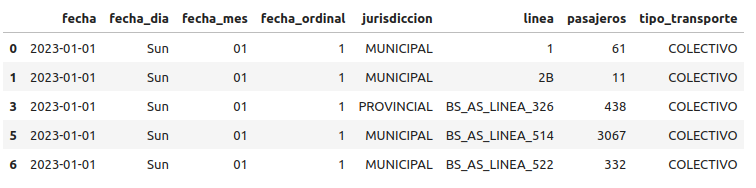

In [6]:
# Se seleccionan las filas de AMBA y se excluyen las que tienen DATOS_PRELIMINAR="SI":
df_sube_amba = df_sube[(df_sube.AMBA == "SI") & (df_sube.DATO_PRELIMINAR == "NO")]

# Se crea un nuevo data frame con las columnas que requeridas:
datos_amba = df_sube_amba[['DIA_TRANSPORTE','FECHA_DIA', 'FECHA_MES','FECHA_ORDINAL','JURISDICCION', 'LINEA', 'CANTIDAD', 'TIPO_TRANSPORTE']]

# Se renombran las columnas
datos_amba.columns = ['fecha', 'fecha_dia', 'fecha_mes', 'fecha_ordinal', 'jurisdiccion', 'linea', 'pasajeros', 'tipo_transporte']

# Se convierte la fecha del mes en string de 2 dígitos
datos_amba.loc[:, 'fecha_mes'] = datos_amba['fecha_mes'].astype(str).str.zfill(2)

# Se muestra el resultado
datos_amba.head()

,fecha,fecha_dia,fecha_mes,fecha_ordinal,jurisdiccion,linea,pasajeros,tipo_transporte
0,2023-01-01,Domingo,01,1,MUNICIPAL,1,61,COLECTIVO
1,2023-01-01,Domingo,01,1,MUNICIPAL,2B,11,COLECTIVO
3,2023-01-01,Domingo,01,1,PROVINCIAL,BS_AS_LINEA_326,438,COLECTIVO
5,2023-01-01,Domingo,01,1,MUNICIPAL,BS_AS_LINEA_514,3067,COLECTIVO
6,2023-01-01,Domingo,01,1,MUNICIPAL,BS_AS_LINEA_522,332,COLECTIVO


3. Utilizando datos_amba, identificar:

(a) la proporción de la cantidad total anual de pasajeros que le corresponde a cada medio de transporte

In [7]:
# Se verifica el rango de fecha de los datos
print("Rango de fechas en datos_amba: {} a {}".format(datos_amba.fecha.min().strftime("%Y-%m"),datos_amba.fecha.max().strftime("%Y-%m")))

Rango de fechas en datos_amba: 2023-01 a 2023-12


In [8]:
# Al existir sólo un año, la proporción pedida es
total_pasajeros = datos_amba.pasajeros.sum()
proporcion_transporte = datos_amba.groupby('tipo_transporte')['pasajeros'].sum() / total_pasajeros * 100

# Se muestran los datos, redondeando a 2 decimales
for tipo_transporte, porcentaje in proporcion_transporte.items():
    porcentaje_redondeado = round(porcentaje, 3)
    print("{}: {:.2f}%".format(tipo_transporte, porcentaje_redondeado))


COLECTIVO: 83.76%
SUBTE: 6.81%
TREN: 9.43%


(b) la tupla (mes, línea de subte) donde viajó la mayor cantidad de pasajeros

In [9]:
# Se filtra por medio de transporte= SUBTE
datos_amba_subte = datos_amba[datos_amba.tipo_transporte == "SUBTE"]

# Se agrupo por fecha_mes y linea, sumando los pasajeros
agrupado_1 = datos_amba_subte.groupby(["fecha_mes","linea"])['pasajeros'].sum()

# El método idmax() devuelve el índice de la agrupación, para el valor máximo, en este caso mes '08', línea B
id_max_pasajeros = agrupado_1.idxmax()
id_max_pasajeros

('08', 'LINEA_B')

(c) el día hábil con menor desvío estándar en cantidad de pasajeros

In [10]:
# Se filtra por día hábil
dias_habiles= ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes"]
datos_amba_habil = datos_amba[datos_amba.fecha_dia.isin(dias_habiles)]

# Se agrupo por día y se calcula el desvío estandar
agrupado_2 = datos_amba_habil.groupby('fecha_dia')['pasajeros'].std()
print(agrupado_2)

# El método idmin() devuelve el índice de la agrupación, para el valor mínimo, en este caso dia lunes
id_min_std_pasajeros = agrupado_2.idxmin()
print ("\nEl día hábil con menor desvío estándar es el día: " + id_min_std_pasajeros)

fecha_dia
Jueves       35968.322235
Lunes        33577.463774
Martes       35833.736746
Miércoles    35980.849033
Viernes      35059.693351
Name: pasajeros, dtype: float64

El día hábil con menor desvío estándar es el día: Lunes


## **Análisis exploratorio**

¿Cómo varía el uso del transporte público a lo largo del año?


In [11]:
# Carga del archivo para reinicial el data frame
df_sube = pd.read_csv("sube-2023.csv")
            
# Se cambia el tipo de datos de la columna DIA_TRANSPORTE y se crean las columna FECHA_DIA y FECHA_MES que se utilizarán mas adelante
df_sube['DIA_TRANSPORTE'] = pd.to_datetime(df_sube['DIA_TRANSPORTE'], format='%Y-%m-%d')
df_sube['FECHA_MES'] = df_sube['DIA_TRANSPORTE'].apply(lambda z: z.month)
df_sube['FECHA_DIA'] = df_sube['DIA_TRANSPORTE'].apply(lambda x: dia_sem(x.weekday()))

C:\Users\mgres\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):
C:\Users\mgres\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):
C:\Users\mgres\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


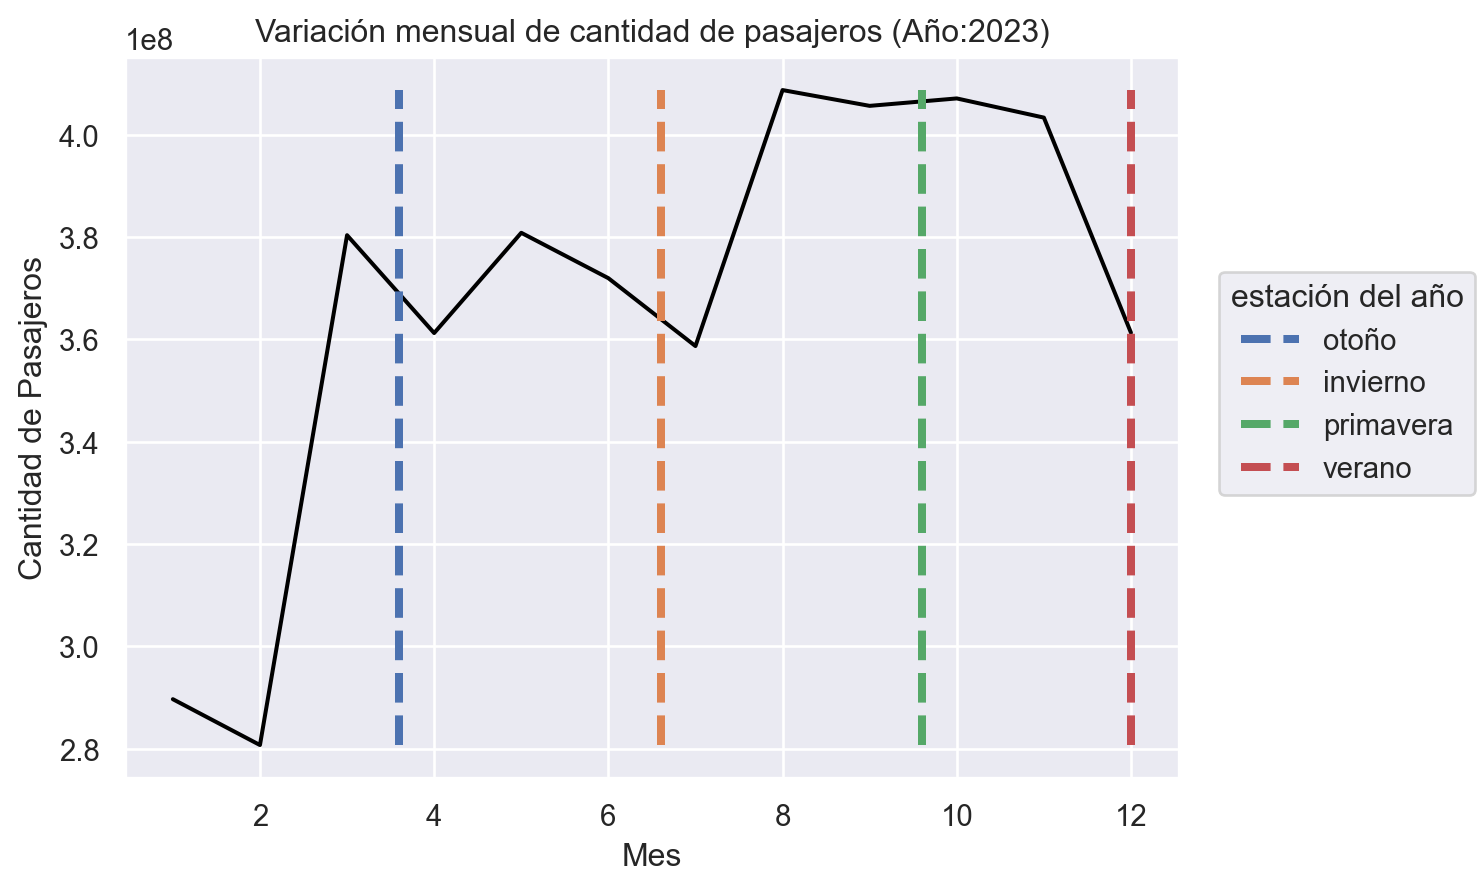

In [12]:
# Se visualiza la variación mensual de la cantidad de pasajeros para todos los medios de transporte durante el año 2023
variacion_mensual=df_sube.groupby(['FECHA_MES'])['CANTIDAD'].sum().reset_index()
max=variacion_mensual['CANTIDAD'].max()
min=variacion_mensual['CANTIDAD'].min()
df_dummy=pd.DataFrame({'x': [3.6,3.6,6.6,6.6,9.6,9.6,12,12], 'y': [min,max,min,max,min,max,min,max], 'estación del año':['otoño','otoño','invierno','invierno','primavera','primavera','verano','verano']})
df_dummy
p=(
so.Plot(data=variacion_mensual,
        x='FECHA_MES',
        y='CANTIDAD')
.add(so.Line(color='black'))
.add(so.Line(linewidth=3,linestyle='--'), data=df_dummy, x='x', y='y',color='estación del año',text='estación del año')
.add(so.Text())
#.scale(x=so.Nominal())
)
p.label(y='Cantidad de Pasajeros',x='Mes',title='Variación mensual de cantidad de pasajeros (Año:2023)')

¿Se observa el mismo efecto en AMBA y en el interior del país?

C:\Users\mgres\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):
C:\Users\mgres\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


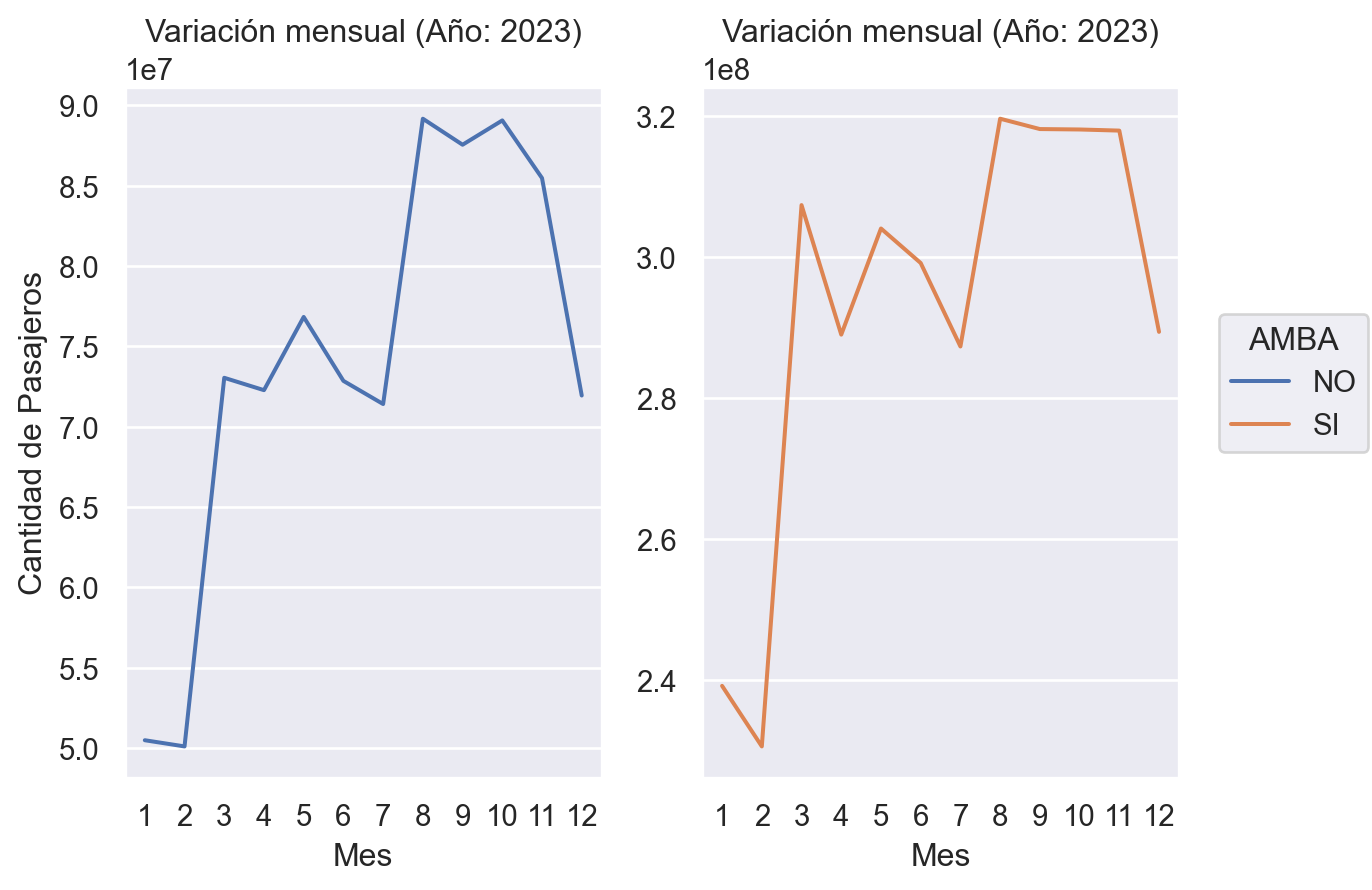

In [13]:
# Se visualiza la variación en mensual en AMBA y el resto del país
variacion_mensual=df_sube.groupby(['FECHA_MES','AMBA'])['CANTIDAD'].sum().reset_index()
p=(
so.Plot(data=variacion_mensual,
        x='FECHA_MES',
        y='CANTIDAD')
.add(so.Line(), color='AMBA')
.facet('AMBA').share(y=False)
.scale(x=so.Nominal())
)
p.label(y='Cantidad de Pasajeros',x='Mes',title='Variación mensual (Año: 2023)')

¿Y en todos los medios de transporte por igual?

C:\Users\mgres\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):
C:\Users\mgres\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):
C:\Users\mgres\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):
C:\Users\mgres\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

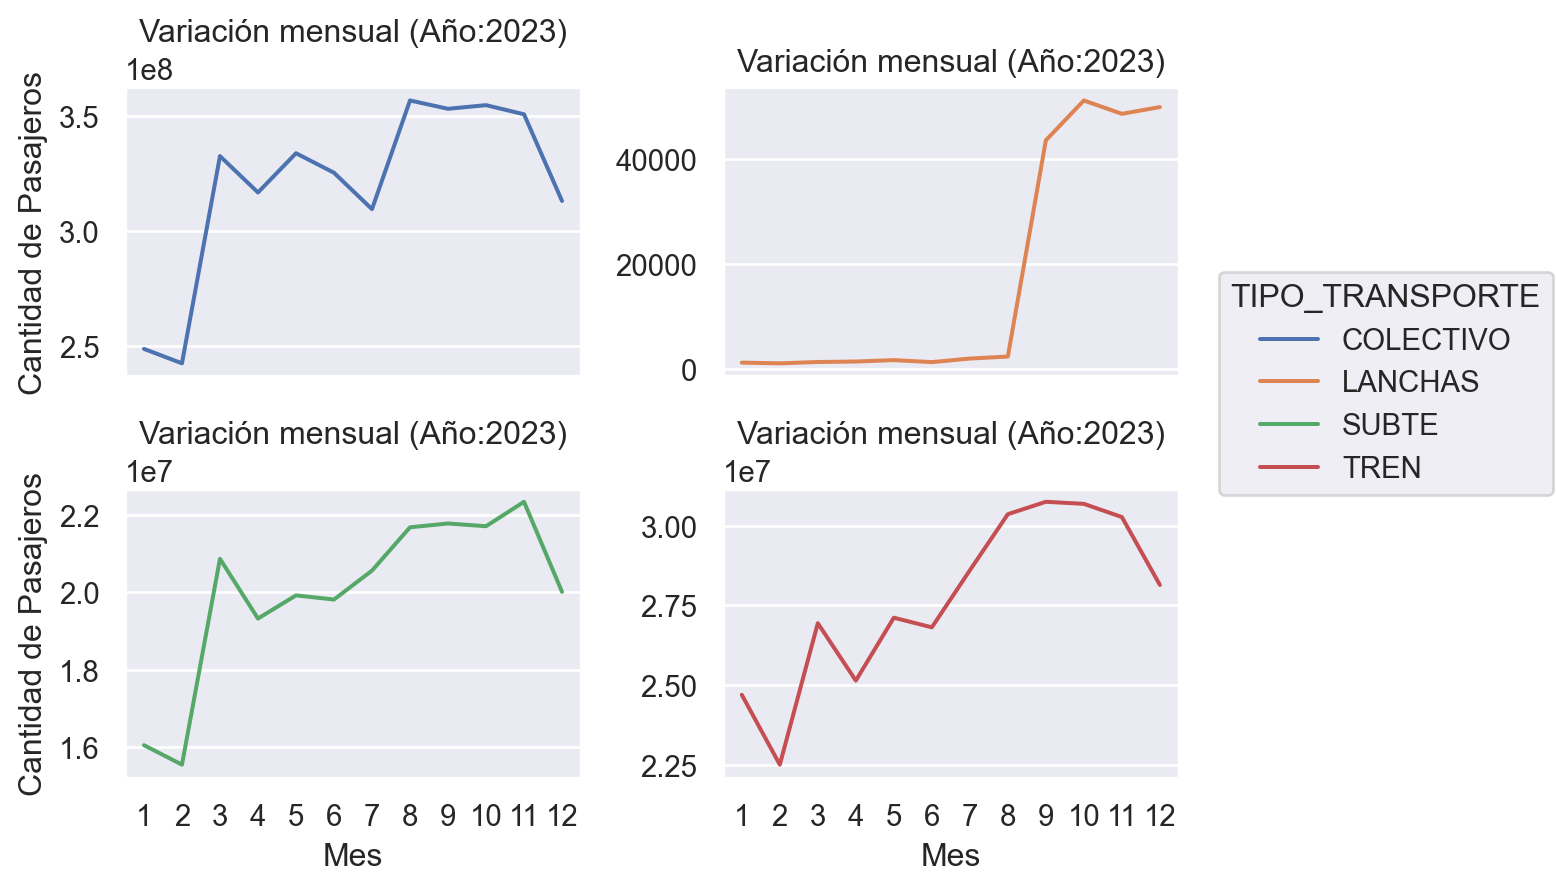

In [14]:
# Se visualiza la variación mensual por tipo de transporte
variacion_mensual=df_sube.groupby(['FECHA_MES','TIPO_TRANSPORTE'])['CANTIDAD'].sum().reset_index()
p=(
so.Plot(data=variacion_mensual,
        x='FECHA_MES',
        y='CANTIDAD')
.add(so.Line(),color='TIPO_TRANSPORTE')
.facet('TIPO_TRANSPORTE', wrap=2).share(y=False)
.scale(x=so.Nominal())
)
p.label(y='Cantidad de Pasajeros',x='Mes',title='Variación mensual (Año:2023)')


En el gráfico anterior se observa que el medio de transporte mas utilizado en el 2023 fue el Colectivo. 
Si hubiésemos miramos el promedio, hubiéramos asumido que el Subte es el medio de transporte que concentra mayor cantidad de pasajeros.
Esto ocurre porque existen muchos mas colectivos que líneas de subte en todo el país. 

Esto se puede ver en el siguiente gráfico:

C:\Users\mgres\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


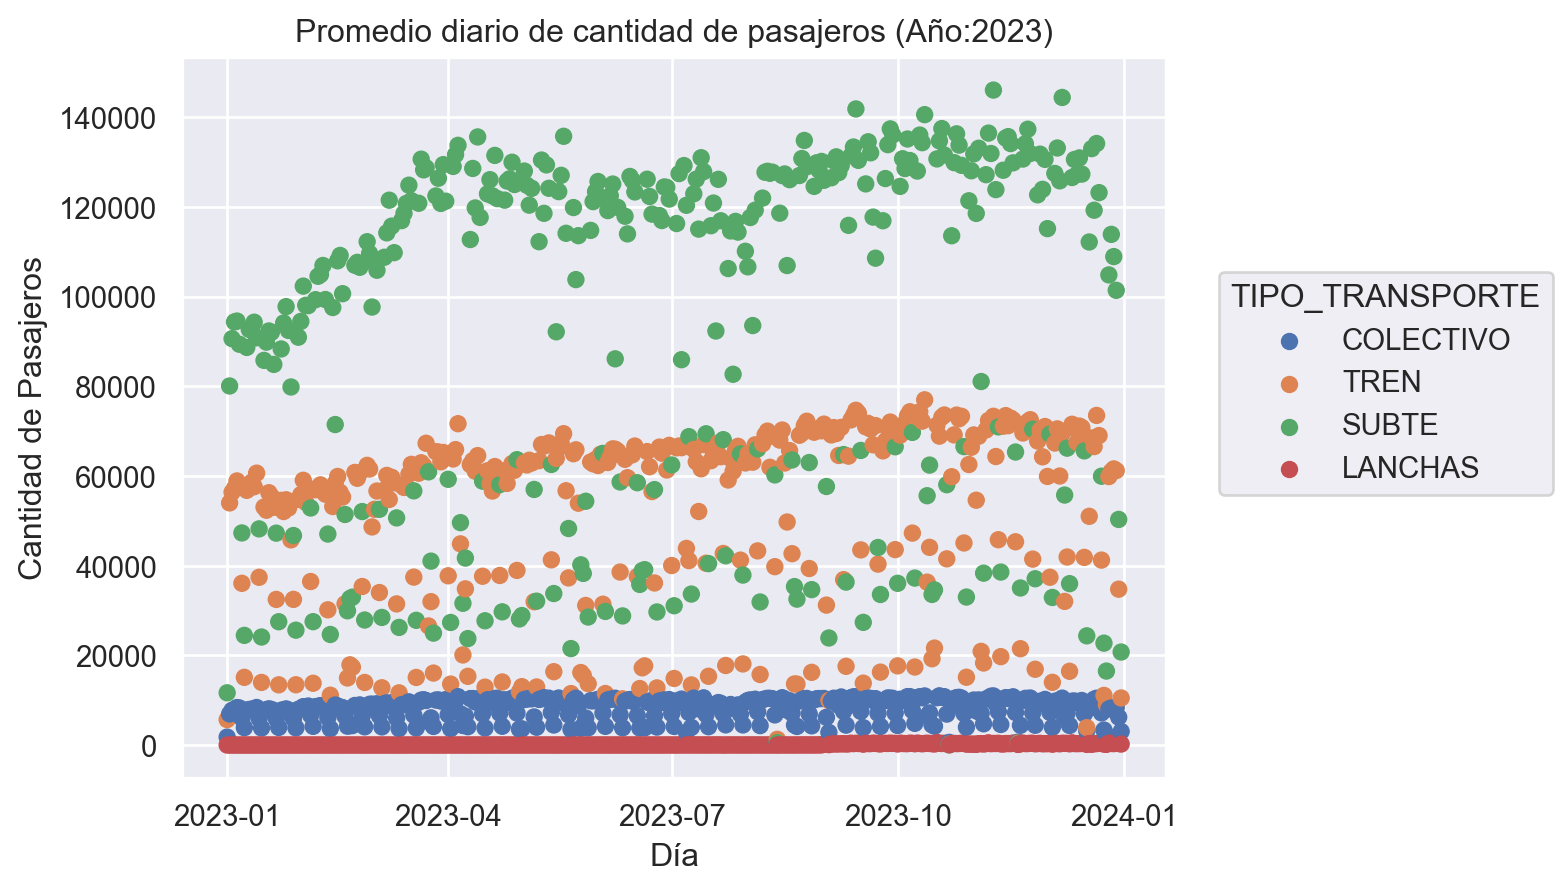

In [15]:
p=(
so.Plot(data=df_sube,
        x='DIA_TRANSPORTE',
        y='CANTIDAD')
.add(so.Dot(),so.Agg("mean"),color='TIPO_TRANSPORTE')
)
p.label(y='Cantidad de Pasajeros',x='Día',title='Promedio diario de cantidad de pasajeros (Año:2023)')

Si agrupamos solo por tipo de transporte y calculamos el promedio diario, podemos ver que el colectivo es el mas utilizado:

C:\Users\mgres\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


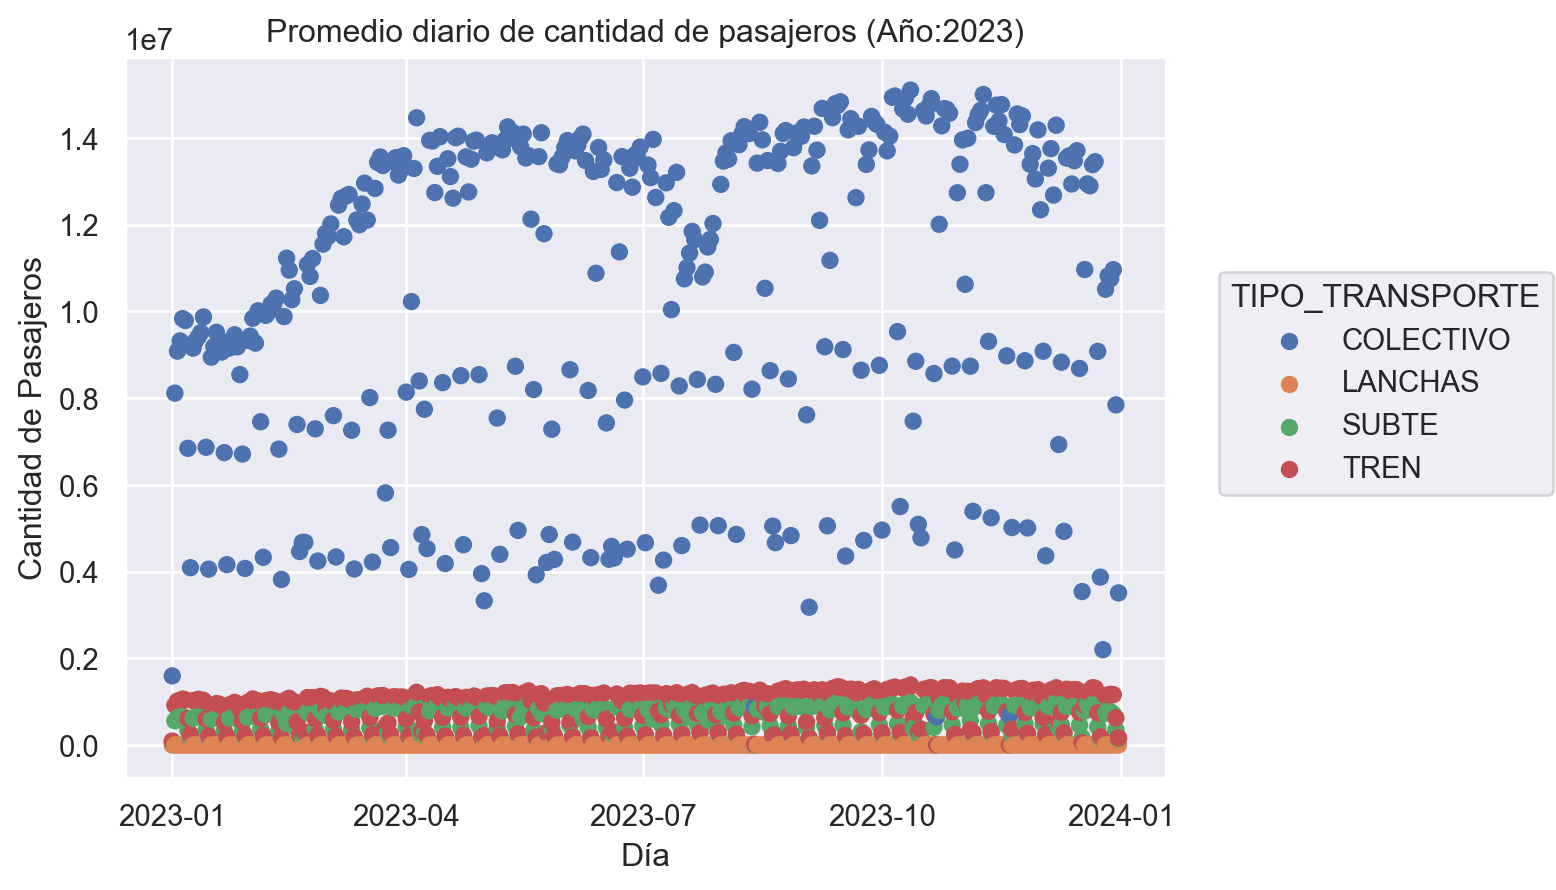

In [16]:
df_medios_transporte= df_sube.groupby(['DIA_TRANSPORTE','TIPO_TRANSPORTE'])['CANTIDAD'].sum().reset_index()

p=(
so.Plot(data=df_medios_transporte,
        x='DIA_TRANSPORTE',
        y='CANTIDAD')
.add(so.Dot(),so.Agg("mean"),color='TIPO_TRANSPORTE')
)
p.label(y='Cantidad de Pasajeros',x='Día',title='Promedio diario de cantidad de pasajeros (Año:2023)')

¿Cómo difiere el uso del transporte público durante los días hábiles en comparación a los fines de semana?

C:\Users\mgres\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


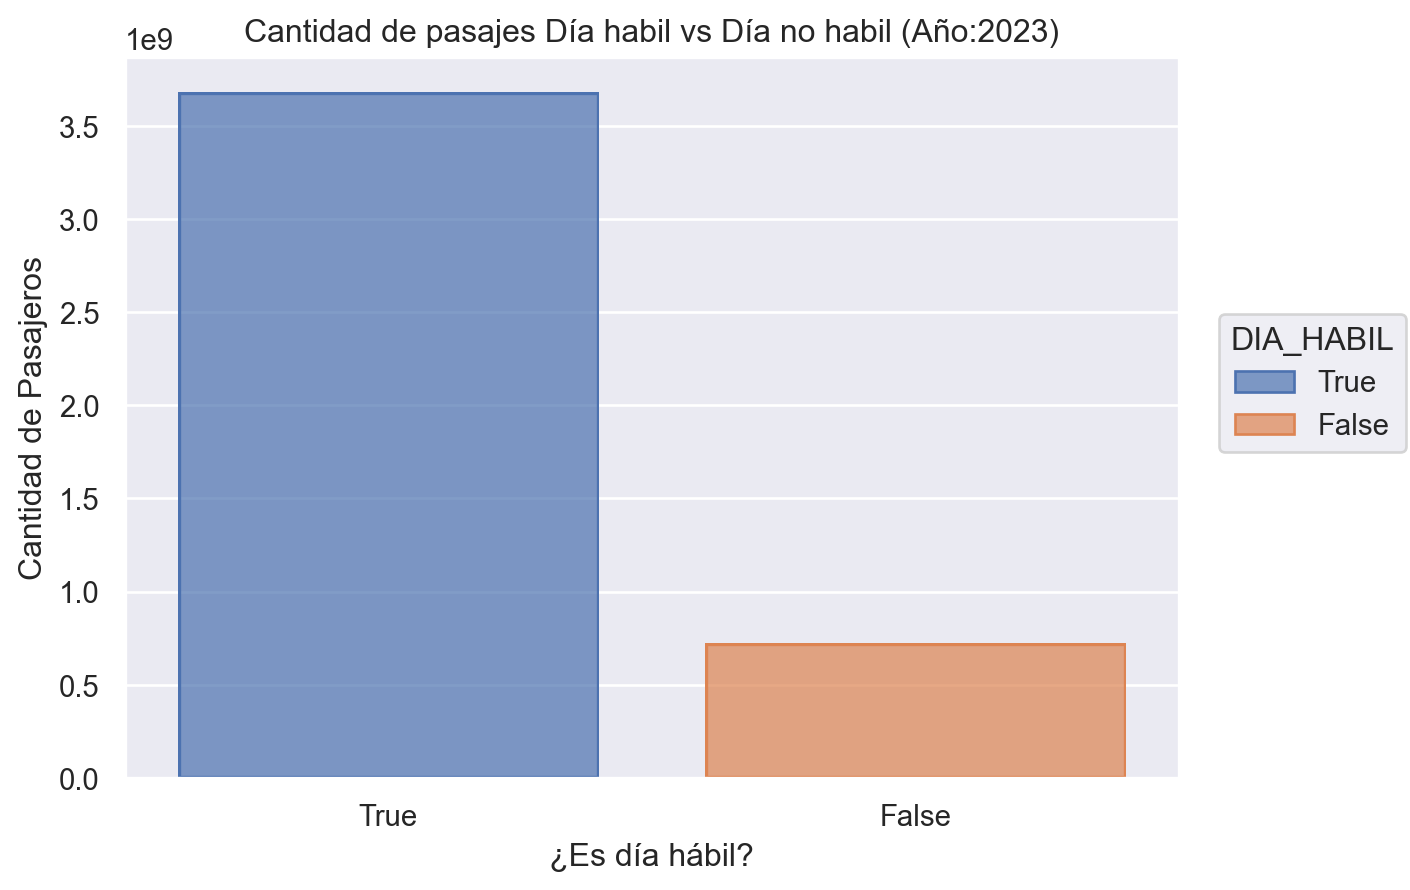

In [17]:
# Se agreaga la columna DIA_HABIL que indica is un día es o no es hábil
df_sube['DIA_HABIL']= df_sube['FECHA_DIA'].isin(dias_habiles)

# Se visualiza la proporción del uso del transporte en los días hábiles y no hábiles
uso_transporte=df_sube.groupby(['DIA_HABIL'])['CANTIDAD'].sum().reset_index()
p=(
    so.Plot(data=uso_transporte, x='DIA_HABIL',y='CANTIDAD',color='DIA_HABIL')
    .add(so.Bar())
)
p.label(y='Cantidad de Pasajeros',x='¿Es día hábil?',title='Cantidad de pasajes Día habil vs Día no habil (Año:2023)')


¿Hay algún día hábil que resulte un outlier? ¿Pueden explicarlo?

C:\Users\mgres\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


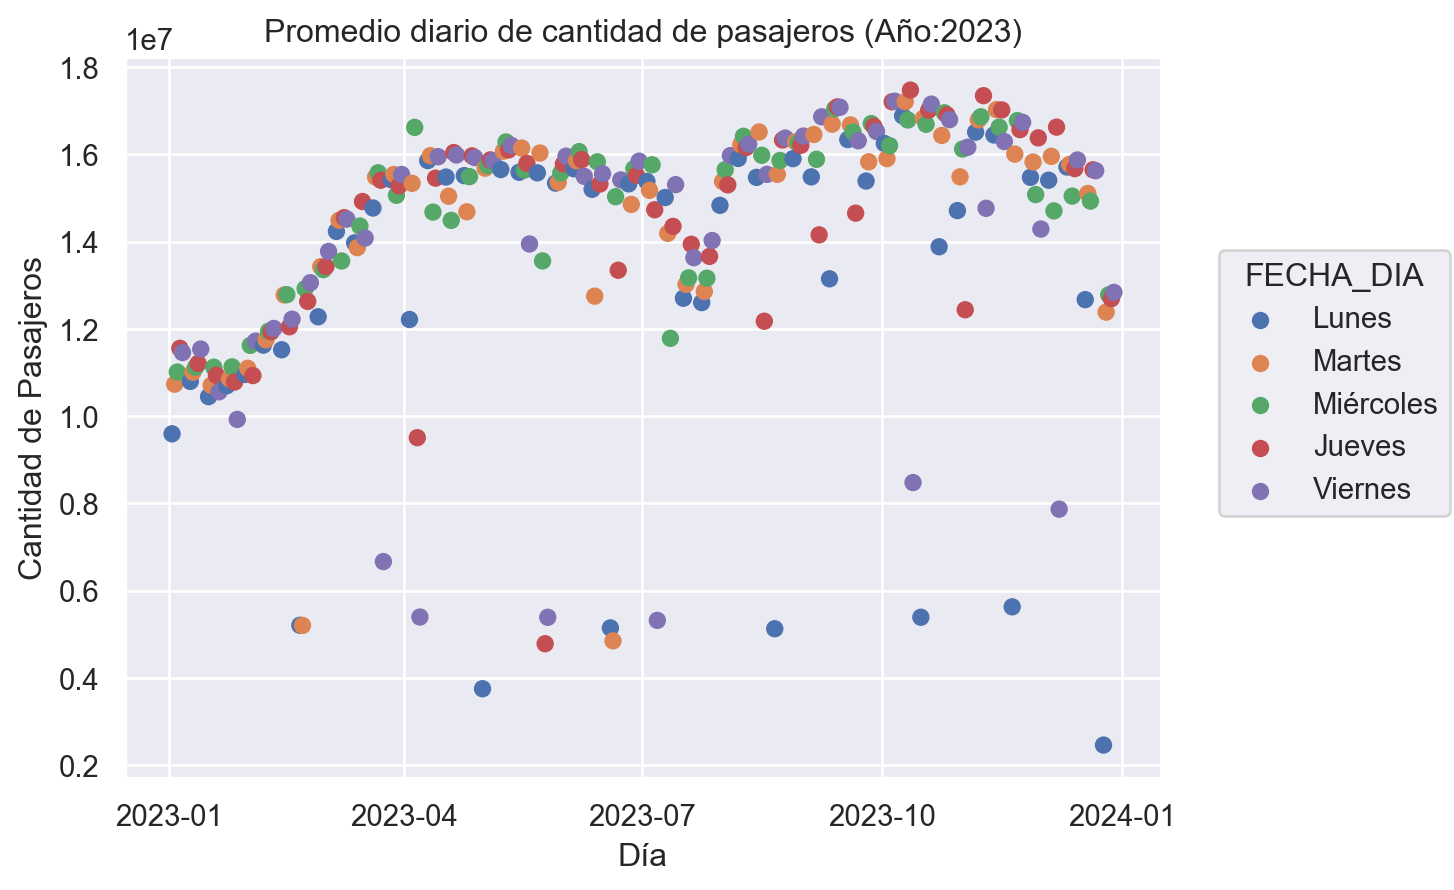

In [18]:
df_medios_transporte= df_sube[df_sube['DIA_HABIL']].groupby(['DIA_TRANSPORTE','FECHA_DIA'])['CANTIDAD'].sum().reset_index()

p=(
    so.Plot(data=df_medios_transporte,
            x='DIA_TRANSPORTE',
            y='CANTIDAD')
    .add(so.Dot(),so.Agg("mean"),color='FECHA_DIA')
)
p.label(y='Cantidad de Pasajeros',x='Día',title='Promedio diario de cantidad de pasajeros (Año:2023)')

En el gráfico se puede ver que la mayoría de los outliers son de los días lunes o viernes, muy probablemente sean días feriado

Lo verificamos:

In [19]:
# Se ordenan los datos de menor a mayor por cantidad de pasajeros por día y se seleccionan los 10 primeros
df_medios_transporte_sorted= df_medios_transporte.sort_values('CANTIDAD').reset_index(drop=True)
df_medios_transporte_sorted[:10]


,DIA_TRANSPORTE,FECHA_DIA,CANTIDAD
0,2023-12-25,Lunes,2458796
1,2023-05-01,Lunes,3749434
2,2023-05-25,Jueves,4781470
3,2023-06-20,Martes,4847022
4,2023-08-21,Lunes,5124589
5,2023-06-19,Lunes,5144001
6,2023-02-21,Martes,5200550
7,2023-02-20,Lunes,5204374
8,2023-07-07,Viernes,5316789
9,2023-05-26,Viernes,5387024


Se puede verificar que son feriados en la web https://www.argentina.gob.ar/interior/feriados-nacionales-2023

## Modelado



In [20]:
# Carga de los archivos
df_sube_regresion = pd.read_csv("sube-2023-regresion.csv")
df_sube_regresion


,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR
0,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,1,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,61,NO
1,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,2B,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,11,NO
2,2023-01-01,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1707,NO
3,2023-01-01,COMPAÑIA DE TRANSPORTE VECINAL S.A.,BS_AS_LINEA_326,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,438,NO
4,2023-01-01,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1189,NO
...,...,...,...,...,...,...,...,...,...,...
323321,2023-12-30,S.A TRANSPORTE CIUDAD DE RIO CUARTO,TRONCAL A,NO,COLECTIVO,MUNICIPAL,CORDOBA,RIO CUARTO,135,NO
323322,2023-12-30,S.A TRANSPORTE CIUDAD DE RIO CUARTO,TRONCAL B,NO,COLECTIVO,MUNICIPAL,CORDOBA,RIO CUARTO,131,NO
323323,2023-12-30,S.A TRANSPORTE CIUDAD DE RIO CUARTO,TRONCAL C,NO,COLECTIVO,MUNICIPAL,CORDOBA,RIO CUARTO,133,NO
323324,2023-12-30,S.A TRANSPORTE CIUDAD DE RIO CUARTO,TRONCAL D,NO,COLECTIVO,MUNICIPAL,CORDOBA,RIO CUARTO,139,NO


(a) Generar un DataFrame en el que las columnas sean las líneas de colectivo (TIPO_TRANSPORTE
== "COLECTIVO") de AMBA de jurisdicción nacional (PROVINCIA == "JN") y las observaciones sean los días del año. Es decir, cada fila del DataFrame corresponde a un día
del año, y en esa fila deben figurar la cantidad de pasajeros que viajaron en cada línea de
colectivo en el día correspondiente.

In [21]:
datos_ColectivoJN=df_sube_regresion[(df_sube_regresion['TIPO_TRANSPORTE']=='COLECTIVO') & (df_sube_regresion['AMBA']=='SI') & (df_sube_regresion['PROVINCIA']=='JN')]
cols= datos_ColectivoJN['LINEA'].unique()
inds= datos_ColectivoJN['DIA_TRANSPORTE'].unique()

df_lineas= pd.DataFrame(index=inds,columns=cols)
for linea in cols:
  df_lin=datos_ColectivoJN[datos_ColectivoJN['LINEA']==linea][['DIA_TRANSPORTE','CANTIDAD']]
  df_linea=pd.DataFrame(data=df_lin['CANTIDAD'].values, columns=['CANTIDAD'], index=df_lin['DIA_TRANSPORTE'].values)
  df_lineas[linea]=df_linea['CANTIDAD']

df_lineas

,BS_ASLINEA_123,BSAS_LINEA_002,BSAS_LINEA_009,BSAS_LINEA_010,BSAS_LINEA_015,BSAS_LINEA_017,BSAS_LINEA_019,BSAS_LINEA_020,BSAS_LINEA_021,BSAS_LINEA_022,...,LINEA 5,LINEA 50,LINEA 6,LINEA 7,LINEA 76,LINEA 8,LINEA_099,LINEA_119_AMBA,LINEA_164_AMBA,LINEA 119
2023-01-01,1681,5670,5644,5177,9109,7013,1604,2617,11235,2202,...,4832.0,4839,2449,2184,3797,5317,1882,1573.0,3210,NaN
2023-01-02,9440,21759,23284,21176,45269,29962,13921,11934,55611,13823,...,20333.0,16221,10486,12774,17374,23250,10322,7345.0,19362,NaN
2023-01-04,10540,24755,25405,23806,52873,33659,16172,13366,61721,16206,...,23041.0,18448,12193,13949,19860,26294,11981,7925.0,21784,NaN
2023-01-05,10408,25772,26489,24688,53436,35182,16569,12929,62510,16863,...,23928.0,18481,12888,14668,21235,27216,11787,7597.0,22972,NaN
2023-01-06,10530,26021,26458,24167,53163,35212,16459,12955,63528,16846,...,24247.0,19300,12703,14199,23472,27073,11567,7811.0,23411,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,15957,35664,26684,31803,65544,47601,23197,16051,67748,24169,...,NaN,25838,16870,19426,28628,62260,15823,NaN,30177,13488.0
2023-12-23,8844,24236,19188,19964,43408,31986,12357,9859,50972,14347,...,NaN,13817,7896,9332,21468,43152,8991,NaN,16025,9699.0
2023-12-27,12721,29591,24693,29374,60347,41283,19417,14498,60169,22126,...,NaN,21545,13454,14923,25542,51921,11385,NaN,16931,13262.0
2023-12-29,11970,29355,27200,28708,56713,41937,17945,14579,62203,21557,...,NaN,21150,13622,16020,27094,53424,11755,NaN,20705,12590.0


(b) Eliminar las columnas correspondientes a líneas de colectivo que tengan datos faltantes

In [22]:
for linea in df_lineas.columns:
  if True in df_lineas[linea].isna().unique():
    pasajeros_por_linea=df_lineas.drop(columns=[linea])

# Algunos nombres de columnas tienen espacios
pasajeros_por_linea = pasajeros_por_linea.rename(columns=lambda x: x.replace(' ', '_'))
pasajeros_por_linea

,BS_ASLINEA_123,BSAS_LINEA_002,BSAS_LINEA_009,BSAS_LINEA_010,BSAS_LINEA_015,BSAS_LINEA_017,BSAS_LINEA_019,BSAS_LINEA_020,BSAS_LINEA_021,BSAS_LINEA_022,...,LINEA_44,LINEA_5,LINEA_50,LINEA_6,LINEA_7,LINEA_76,LINEA_8,LINEA_099,LINEA_119_AMBA,LINEA_164_AMBA
2023-01-01,1681,5670,5644,5177,9109,7013,1604,2617,11235,2202,...,4649,4832.0,4839,2449,2184,3797,5317,1882,1573.0,3210
2023-01-02,9440,21759,23284,21176,45269,29962,13921,11934,55611,13823,...,20387,20333.0,16221,10486,12774,17374,23250,10322,7345.0,19362
2023-01-04,10540,24755,25405,23806,52873,33659,16172,13366,61721,16206,...,23595,23041.0,18448,12193,13949,19860,26294,11981,7925.0,21784
2023-01-05,10408,25772,26489,24688,53436,35182,16569,12929,62510,16863,...,23687,23928.0,18481,12888,14668,21235,27216,11787,7597.0,22972
2023-01-06,10530,26021,26458,24167,53163,35212,16459,12955,63528,16846,...,23731,24247.0,19300,12703,14199,23472,27073,11567,7811.0,23411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,15957,35664,26684,31803,65544,47601,23197,16051,67748,24169,...,29079,NaN,25838,16870,19426,28628,62260,15823,NaN,30177
2023-12-23,8844,24236,19188,19964,43408,31986,12357,9859,50972,14347,...,19431,NaN,13817,7896,9332,21468,43152,8991,NaN,16025
2023-12-27,12721,29591,24693,29374,60347,41283,19417,14498,60169,22126,...,26433,NaN,21545,13454,14923,25542,51921,11385,NaN,16931
2023-12-29,11970,29355,27200,28708,56713,41937,17945,14579,62203,21557,...,26018,NaN,21150,13622,16020,27094,53424,11755,NaN,20705


(c) Se quiere ajustar la cantidad de pasajeros en la línea BSAS_LINEA_009 en función de los 
pasajeros en otras líneas. Proponer tres modelos de regresión distintos. En cada modelo 
pueden utilizarse la información solo de otras 5 líneas de colectivos (pueden ser distintas
líneas de colectivo en los distintos modelos). Los criterios de selección de esas 5 colum as
los determinan ustedes, y deben estar explicitados en el informe

In [23]:
df_train, df_test = train_test_split(pasajeros_por_linea, test_size=0.2, random_state=42)
df_train.shape

(200, 135)

**Modelo N° 1** 

Se eligen 5 líneas de colectivo que tengan la cantidad de pasajeros similar a la línea BSAS_LINEA_009, para ello se calcula la "distancia" en la cantidad de pasajeros contra la línea BSAS_LINEA_009 y se eligen las 5 líneas que tienen menor distancia

In [24]:
df = pasajeros_por_linea
# Calculo la diferencia absoluta diaria con respecto a Linea_009
lineas = [col for col in df.columns if col not in ['DIA_TRANSPORTE', 'BSAS_LINEA_009']]
df_diffs = df.copy()

for linea in lineas:
    df_diffs[linea] = (df['BSAS_LINEA_009'] - df[linea]).abs()

#Sumo las diferencias absolutas a lo largo del tiempo para cada línea
suma_diffs = df_diffs[lineas].sum()

#Obtener las 5 líneas con la menor suma de diferencias absolutas
lineas_mas_cercanas = suma_diffs.nsmallest(5).index.tolist()

print("Las 5 líneas más cercanas a Linea_009 son:", lineas_mas_cercanas)

Las 5 líneas más cercanas a Linea_009 son: ['BSAS_LINEA_146', 'BSAS_LINEA_169', 'BSAS_LINEA_078', 'LINEA_5', 'BSAS_LINEA_045']


In [25]:
#Tomamos las 5 lineas más cercanas a los valores de la línea 9 a lo largo del tiempo
formula1 = "BSAS_LINEA_009 ~ BSAS_LINEA_146 + BSAS_LINEA_169 + BSAS_LINEA_078 + BSAS_LINEA_045 + LINEA_5"
y1, X1 = (
    Formula(formula1)
    .get_model_matrix(df_train)
)

# Definimos los subconjuntos para la validación cruzada.
# Utilizamos KFold de sklearn con 5 splits
cv = KFold(n_splits=5, random_state=42, shuffle=True)

modelo1 = linear_model.LinearRegression(fit_intercept = False)    # Inicializamos un modelo de Regresion Lineal sin intercept
rmse1 = np.zeros(cv.get_n_splits())  # Vamos a guardar el error en cada pliego

ind = 0

for train_index, val_index in cv.split(X1):
    X_train, X_val, y_train, y_val = X1.iloc[train_index], X1.iloc[val_index], y1.iloc[train_index], y1.iloc[val_index]
    modelo1.fit(X_train, y_train)

    y_pred = modelo1.predict(X_val)
    rmse1[ind] = np.sqrt(mean_squared_error(y_val, y_pred))
    ind = ind + 1

print('Error Cuadrado Medio de cada uno de los splits: ', rmse1)
print('ECM Promedio: ',rmse1.mean())

Error Cuadrado Medio de cada uno de los splits:  [1538.99845696 1871.90457701 2738.1460927  2440.75135437 2549.96995   ]
ECM Promedio:  2227.954086207892



**MODELO 2**

Tomamos líneas cuyo recorridos pasan por alguno de los mismos lugares que la línea BSAS_LINEA_009
El recorrido de la línea 9 es de Villa Caraza hasta Retiro. Visitando la web https://www.omnilineas.com.ar/ podemos seleccionar desde/hasta en lugares cercanos
Para los lugares:

V. Centenario -> Retiro (20,45)

V. Fiorito -> Retiro (28,20,9,143,101)

V. Caraza -> Retiro (9, 28, 75, 20, 45)

V. Internacional -> Retiro (75, 20, 9, 45, 28)

V. del Valle -> Retiro (115, 91, 33)

Tomamos 5 de esas líneas:

In [26]:
formula2 = "BSAS_LINEA_009 ~ BSAS_LINEA_045 + LINEA_33 + BSAS_LINEA_020 + BSAS_LINEA_075 + LINEA_28"
y2, X2 = (
  Formula(formula2)
  .get_model_matrix(df_train)
)

# Definimos los subconjuntos para la validación cruzada.
# Utilizamos KFold de sklearn
cv = KFold(n_splits=5, random_state=42, shuffle=True)

modelo2 = linear_model.LinearRegression(fit_intercept = False)    # Inicializamos un modelo de Regresion Lineal sin intercept
rmse2 = np.zeros(cv.get_n_splits())  # Vamos a guardar el error en cada pliego

ind = 0

for train_index, val_index in cv.split(X2):
    X_train, X_val, y_train, y_val = X2.iloc[train_index], X2.iloc[val_index], y2.iloc[train_index], y2.iloc[val_index]
    modelo2.fit(X_train, y_train)

    y_pred = modelo2.predict(X_val)
    rmse2[ind] = np.sqrt(mean_squared_error(y_val, y_pred))
    ind = ind + 1

print('Error Cuadrado Medio de cada uno de los splits: ', rmse2)
print('ECM Promedio: ',rmse2.mean())

Error Cuadrado Medio de cada uno de los splits:  [2767.76809948 2147.84639561 2977.87630412 3017.47342348 2628.49468625]
ECM Promedio:  2707.891781785781


**Modelo 3**

Para armar el modelo seleccionamos las 5 líneas con mayor cantidad de pasajeros

In [27]:
#Calculando las 5 lineas con mayor cantidad de pasajeros
Agrupado = datos_ColectivoJN.groupby('LINEA')['CANTIDAD'].sum()
d_top5 = Agrupado.sort_values(ascending=False).head(5)
print("Las 5 más grandes son: \n",d_top5)

Las 5 más grandes son: 
 LINEA
BSAS_LINEA_060    23806836
LINEA 28          17120919
BSAS_LINEA_152    16479750
BSAS_LINEA_021    15353400
BSAS_LINEA_148    15204040
Name: CANTIDAD, dtype: int64


In [28]:
# Nos quedamos con 5 con mayor acumulación de pasajeros_
formula3 = "BSAS_LINEA_009 ~ BSAS_LINEA_060 + LINEA_28 + BSAS_LINEA_152 + BSAS_LINEA_021 + BSAS_LINEA_148"
y3, X3 = (
  Formula(formula3)
  .get_model_matrix(df_train)
)

# Definimos los subconjuntos para la validación cruzada.
# Utilizamos KFold de sklearn
cv = KFold(n_splits=5, random_state=42, shuffle=True)

modelo3 = linear_model.LinearRegression(fit_intercept = False)    # Inicializamos un modelo de Regresion Lineal sin intercept
rmse3 = np.zeros(cv.get_n_splits())  # Vamos a guardar el error en cada pliego

ind = 0

for train_index, val_index in cv.split(X3):
    X_train, X_val, y_train, y_val = X3.iloc[train_index], X3.iloc[val_index], y3.iloc[train_index], y3.iloc[val_index]
    modelo3.fit(X_train, y_train)

    y_pred = modelo3.predict(X_val)
    rmse3[ind] = np.sqrt(mean_squared_error(y_val, y_pred))
    ind = ind + 1

print('Error Cuadrado Medio de cada uno de los splits: ', rmse3)
print('ECM Promedio: ',rmse3.mean())

Error Cuadrado Medio de cada uno de los splits:  [2685.85036686 2134.14251457 2578.81395855 2969.05565067 2510.45371506]
ECM Promedio:  2575.6632411421047


(e) Proponer un esquema de validación de los modelos y utilizarlo para seleccionar el mejor de los tres modelos propuestos.

Si comparamos los resultados:
Modelo N° 1, ECM Promedio:  2227.954086207892

Modelo N° 2, ECM Promedio:  2707.891781785781

Modelo N° 3, ECM Promedio:  2575.6632411421047

**El Modelo N° 1 es el que mejor aproxima**

A continuación lo verificamos con los datos de testeo:

In [29]:
#Modelo 1
modelo1.fit(X1,y1)

y1_test, X1_test = (
    Formula(formula1)
    .get_model_matrix(df_test)
)

y1_pred = modelo1.predict(X1_test)

r2 = r2_score(y1_test, y1_pred)
print('R^2: ', r2)
ecm = mean_squared_error(y1_test, y1_pred)
print('Raiz cuadarada del ECM: ', np.sqrt(ecm))

R^2:  0.964196897697226
Raiz cuadarada del ECM:  1871.3259112030526


In [30]:
#Modelo 2
modelo2.fit(X2,y2)

y2_test, X2_test = (
    Formula(formula2)
    .get_model_matrix(df_test)
)

y2_pred = modelo2.predict(X2_test)

r2 = r2_score(y2_test, y2_pred)
print('R^2: ', r2)
ecm = mean_squared_error(y2_test, y2_pred)
print('Raiz cuadarada del ECM: ', np.sqrt(ecm))

R^2:  0.9269989482635035
Raiz cuadarada del ECM:  2645.2582271350625


In [31]:
#Modelo 3
modelo3.fit(X3,y3)

y3_test, X3_test = (
    Formula(formula3)
    .get_model_matrix(df_test)
)

y3_pred = modelo3.predict(X3_test)

r2 = r2_score(y3_test, y3_pred)
print('R^2: ', r2)
ecm = mean_squared_error(y3_test, y3_pred)
print('Raiz cuadarada del ECM: ', np.sqrt(ecm))

R^2:  0.9178392674408733
Raiz cuadarada del ECM:  2829.682941342976


Se verifica que el Modelo N° 1 es el modelo que mejor aproxima los datos:

**Modelo N° 1, R^2:  0.964196897697226**

Modelo N° 2, R^2:  0.9269989482635035

Modelo N° 3, R^2:  0.9178392674408733


(f) Para el modelo elegido, indicar la fórmula final de modelo.

In [32]:
modelo1.coef_

array([[-1.18277988e+03,  8.23956789e-01,  3.14160774e-01,
        -4.71076312e-01,  1.68546561e-01,  2.28130087e-01]])

**Fórmula = "BSAS_LINEA_009 ~ BSAS_LINEA_146 + BSAS_LINEA_169 + BSAS_LINEA_078 + BSAS_LINEA_045 + LINEA_5"**

$y = -941.833776 + 0.81018906 \cdot x1 + 0.396077888 \cdot x2 - 0.604983992 \cdot x3 + 0.182585186 \cdot x4 + 0.27395081 \cdot x5 $1

​donde:

*y= pasajeros de BSAS_LINEA_009*

*x1= pasajeros de BSAS_LINEA_146*

*x2= pasajeros de BSAS_LINEA_169*

*x3= pasajeros de BSAS_LINEA_078*

*x4= pasajeros de BSAS_LINEA_045*

*x5= pasajeros de LINEA_5*
